In [2]:
import numpy as np
import pandas as pd
import HowToBreakIntoTheField as t
import matplotlib.pyplot as plt

In [3]:
from IPython import display
%matplotlib inline

df = pd.read_csv('./survey_results_public.csv')
df.head()

,Respondent,Professional,ProgramHobby,Country,University,EmploymentStatus,FormalEducation,MajorUndergrad,HomeRemote,CompanySize,...,StackOverflowMakeMoney,Gender,HighestEducationParents,Race,SurveyLong,QuestionsInteresting,QuestionsConfusing,InterestedAnswers,Salary,ExpectedSalary
0,1,Student,"Yes, both",United States,No,"Not employed, and not looking for work",Secondary school,NaN,NaN,NaN,...,Strongly disagree,Male,High school,White or of European descent,Strongly disagree,Strongly agree,Disagree,Strongly agree,NaN,NaN
1,2,Student,"Yes, both",United Kingdom,"Yes, full-time",Employed part-time,Some college/university study without earning ...,Computer science or software engineering,"More than half, but not all, the time",20 to 99 employees,...,Strongly disagree,Male,A master's degree,White or of European descent,Somewhat agree,Somewhat agree,Disagree,Strongly agree,NaN,37500.0
2,3,Professional developer,"Yes, both",United Kingdom,No,Employed full-time,Bachelor's degree,Computer science or software engineering,"Less than half the time, but at least one day ...","10,000 or more employees",...,Disagree,Male,A professional degree,White or of European descent,Somewhat agree,Agree,Disagree,Agree,113750.0,NaN
3,4,Professional non-developer who sometimes write...,"Yes, both",United States,No,Employed full-time,Doctoral degree,A non-computer-focused engineering discipline,"Less than half the time, but at least one day ...","10,000 or more employees",...,Disagree,Male,A doctoral degree,White or of European descent,Agree,Agree,Somewhat agree,Strongly agree,NaN,NaN
4,5,Professional developer,"Yes, I program as a hobby",Switzerland,No,Employed full-time,Master's degree,Computer science or software engineering,Never,10 to 19 employees,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [4]:
no_of_countries=df['Country'].value_counts()
no_of_countries.shape

(165,)

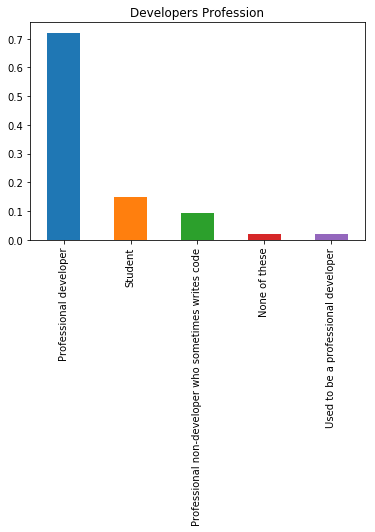

In [5]:
status=df['Professional'].value_counts()
(status/df.shape[0]).plot(kind='bar')
plt.title("Developers Profession");

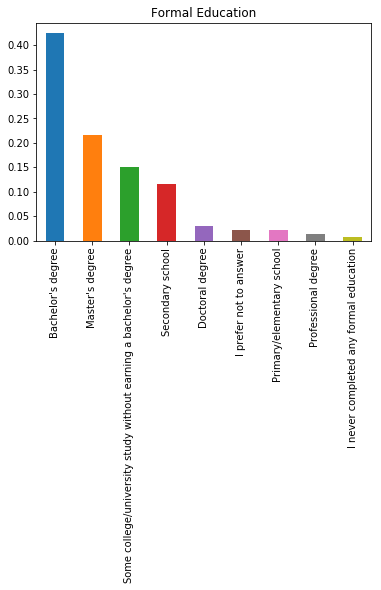

In [6]:
formal_ed=df['FormalEducation'].value_counts()
(formal_ed/df.shape[0]).plot(kind='bar')
plt.title("Formal Education");

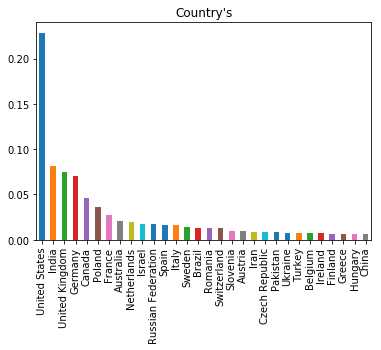

In [7]:
country=df['Country'].value_counts()
(country[:30]/df.shape[0]).plot(kind='bar')
plt.title("Country's");

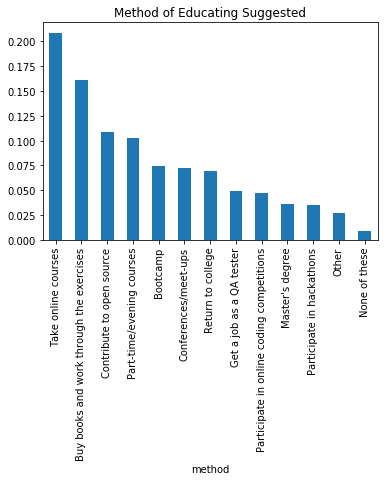

In [8]:
possible_vals = ["Take online courses", "Buy books and work through the exercises", 
                 "None of these", "Part-time/evening courses", "Return to college",
                 "Contribute to open source", "Conferences/meet-ups", "Bootcamp",
                 "Get a job as a QA tester", "Participate in online coding competitions",
                 "Master's degree", "Participate in hackathons", "Other"]

def clean_and_plot(df, title='Method of Educating Suggested', plot=True):
    study = df['CousinEducation'].value_counts().reset_index()
    study.rename(columns={'index': 'method', 'CousinEducation': 'count'}, inplace=True)
    study_df = t.total_count(study, 'method', 'count', possible_vals)

    study_df.set_index('method', inplace=True)
    if plot:
        (study_df/study_df.sum()).plot(kind='bar', legend=None);
        plt.title(title);
        plt.show()
    props_study_df = study_df/study_df.sum()
    return props_study_df
    
props_df = clean_and_plot(df)

In [9]:
js=df.groupby(['FormalEducation']).mean()['JobSatisfaction'].sort_values().dropna()
js

FormalEducation
Bachelor's degree                                                    6.900293
Primary/elementary school                                            6.946237
Master's degree                                                      6.977356
I never completed any formal education                               7.000000
Professional degree                                                  7.075893
Some college/university study without earning a bachelor's degree    7.151268
I prefer not to answer                                               7.211679
Secondary school                                                     7.219512
Doctoral degree                                                      7.438492
Name: JobSatisfaction, dtype: float64

Text(0.5,1,'Job Satisfaction of different Professionals')

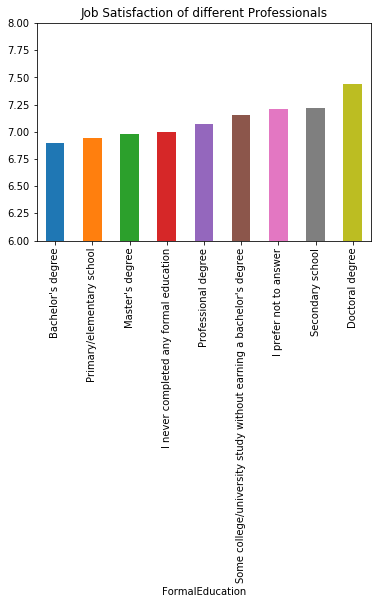

In [11]:
(js).plot(kind='bar')
plt.ylim(6.0, 8.0)
plt.title('Job Satisfaction of different Professionals')

In [62]:
st=df.loc[df['CousinEducation'].isin(possible_vals)]

In [63]:
study = st.groupby(['CousinEducation']).mean()['JobSatisfaction'].sort_values().dropna()

Text(0.5,1,'Job Satisfaction of Cousins after performing suggested tasks')

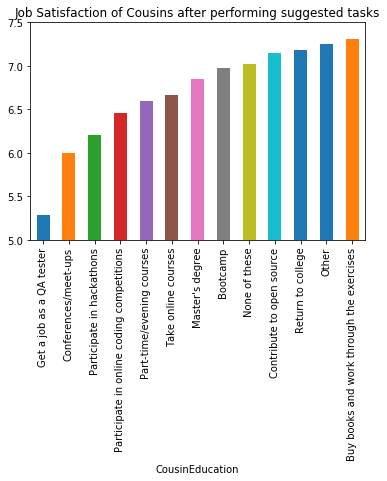

In [65]:
(study).plot(kind='bar')
plt.ylim(5.0,7.5)
plt.title('Job Satisfaction of Cousins after performing suggested tasks')